# The Boston Housing Data

The Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of [ Boston MA](http://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html). The following describes the dataset columns:

* CRIM - per capita crime rate by town
* ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS - proportion of non-retail business acres per town.
* CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
* NOX - nitric oxides concentration (parts per 10 million)
* RM - average number of rooms per dwelling
* AGE - proportion of owner-occupied units built prior to 1940
* DIS - weighted distances to five Boston employment centres
* RAD - index of accessibility to radial highways
* TAX - full-value property-tax rate per \$10,000
* PTRATIO - pupil-teacher ratio by town
* B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
* LSTAT - % lower status of the population
* MEDV - Median value of owner-occupied homes in \$1000's



In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import read_csv
#Lets load the dataset and sample some
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = read_csv('housing.csv', header=None, delimiter=r"\s+", names=column_names)
# Dimension of the dataset
print(np.shape(data))
# Let's summarize the data to see the distribution of data
print(data.describe())

(506, 14)
             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861

In [2]:
data = data[~(data['MEDV'] >= 50.0)]
print(np.shape(data))

(490, 14)


In [3]:
data.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.199075,0.408053,-0.064210,0.420476,-0.219307,0.353751,-0.382231,0.627434,0.583711,0.287079,-0.384460,0.461755,-0.450115
ZN,-0.199075,1.000000,-0.527121,-0.053911,-0.512137,0.310506,-0.563184,0.673227,-0.307726,-0.302897,-0.381815,0.176117,-0.422090,0.404608
INDUS,0.408053,-0.527121,1.000000,0.035815,0.765155,-0.412413,0.637970,-0.710284,0.596124,0.717678,0.387656,-0.363394,0.636527,-0.600005
CHAS,-0.064210,-0.053911,0.035815,1.000000,0.085619,0.044979,0.071194,-0.077705,-0.032786,-0.067743,-0.116830,0.041707,-0.006486,0.074803
NOX,0.420476,-0.512137,0.765155,0.085619,1.000000,-0.322609,0.727671,-0.768122,0.612160,0.667380,0.188381,-0.383087,0.612444,-0.524451
RM,-0.219307,0.310506,-0.412413,0.044979,-0.322609,1.000000,-0.268464,0.245789,-0.195768,-0.281955,-0.293299,0.119204,-0.610369,0.686634
AGE,0.353751,-0.563184,0.637970,0.071194,0.727671,-0.268464,1.000000,-0.743043,0.451939,0.499682,0.268459,-0.279002,0.637879,-0.492915
DIS,-0.382231,0.673227,-0.710284,-0.077705,-0.768122,0.245789,-0.743043,1.000000,-0.491875,-0.532025,-0.246773,0.299426,-0.536493,0.368813
RAD,0.627434,-0.307726,0.596124,-0.032786,0.612160,-0.195768,0.451939,-0.491875,1.000000,0.909000,0.456035,-0.451534,0.510192,-0.476296
TAX,0.583711,-0.302897,0.717678,-0.067743,0.667380,-0.281955,0.499682,-0.532025,0.909000,1.000000,0.452252,-0.448211,0.566467,-0.572442


From correlation matrix, we see TAX and RAD are highly correlated features. The columns LSTAT, INDUS, RM, TAX, NOX, PTRAIO has a correlation score above 0.5 with MEDV which is a good indication of using as predictors. Let's plot these columns against MEDV. 

In [4]:
from sklearn import preprocessing
# Let's scale the columns before plotting them against MEDV
min_max_scaler = preprocessing.MinMaxScaler()
column_sels = ['LSTAT', 'INDUS', 'NOX', 'PTRATIO', 'RM', 'TAX', 'DIS', 'AGE']
x = data.loc[:,column_sels]
y = data['MEDV']
x = pd.DataFrame(data=min_max_scaler.fit_transform(x), columns=column_sels)

"""
So with these analsis, we may try predict MEDV with 'LSTAT', 'INDUS', 'NOX', 'PTRATIO', 'RM', 'TAX', 'DIS', 'AGE' features. 
Let's try to remove the skewness of the data trough log transformation.
"""
y =  np.log1p(y)
for col in x.columns:
    if np.abs(x[col].skew()) > 0.3:
        x[col] = np.log1p(x[col])

# Train the Model - SVR

In [5]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import numpy as np
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

x_scaled = min_max_scaler.fit_transform(x)
kf = KFold(n_splits=10)
scores_map = {}
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr_rbf.fit(x_scaled, y)
scores = cross_val_score(svr_rbf, x_scaled, y, cv=kf, scoring='neg_mean_squared_error')
scores_map['SVR'] = scores
print("MSE: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

MSE: -0.04 (+/- 0.03)


# Train the Model - GBR

In [6]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(alpha=0.9,learning_rate=0.05, max_depth=2, min_samples_leaf=5, min_samples_split=2, n_estimators=100, random_state=30)
gbr.fit(x_scaled, y)
scores = cross_val_score(gbr, x_scaled, y, cv=kf, scoring='neg_mean_squared_error')
scores_map['GradientBoostingRegressor'] = scores
print("MSE: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

MSE: -0.03 (+/- 0.02)


# Sample Random Variables - Independent

### We first assume that the data are independent and follows the normal distribution 

In [7]:
"""
Indepdent Inputs
"""

import active_subspaces.utils.misc as misc
import active_subspaces as ac

M = 10000 #This is the number of data points to use
d = 8

column_sels = ['LSTAT', 'INDUS', 'NOX', 'PTRATIO', 'RM', 'TAX', 'DIS', 'AGE']
#Sample the input space according to the distributions in the table above
LSTAT = np.random.normal(x['LSTAT'].mean(),x['LSTAT'].std(), (M, 1))
INDUS = np.random.normal(x['INDUS'].mean(),x['INDUS'].std(), (M, 1))
NOX = np.random.normal(x['NOX'].mean(),x['NOX'].std(), (M, 1))
PTRATIO = np.random.normal(x['PTRATIO'].mean(),x['PTRATIO'].std(), (M, 1))
RM = np.random.normal(x['RM'].mean(),x['RM'].std(), (M, 1))
TAX = np.random.normal(x['TAX'].mean(),x['TAX'].std(), (M, 1))
DIS = np.random.normal(x['DIS'].mean(),x['DIS'].std(), (M, 1))
AGE = np.random.normal(x['AGE'].mean(),x['AGE'].std(), (M, 1))
XX = np.hstack((LSTAT, INDUS, NOX, PTRATIO,RM,TAX,DIS,AGE))
x_scaled = min_max_scaler.fit_transform(XX)
print(x_scaled)
# save the sampled data
np.savetxt('sample_data_independent.csv', x_scaled, delimiter=',')

[[0.35524289 0.51381194 0.17910014 ... 0.41544718 0.72110393 0.58740382]
 [0.47148725 0.45626394 0.5277097  ... 0.58539018 0.34479678 0.29557369]
 [0.54879735 0.49402714 0.32689211 ... 0.56454966 0.59441873 0.54028134]
 ...
 [0.62421575 0.53436399 0.55388909 ... 0.74453565 0.4278612  0.61945825]
 [0.51252838 0.40775402 0.32619407 ... 0.48511615 0.45155607 0.64109324]
 [0.56767896 0.59375539 0.50202575 ... 0.38331693 0.2712573  0.35668364]]


# Sensitivity Analysis - SVR Model

In [8]:
def DerSHAP(df):
    """
    Input: 
        df: M-by-d matrix, that contains estimated partial derivatives( in our case, approximated by finite difference method)
    Output: 
        norm_shap:  normalized DerSHAP values
    Parameters:
        C: d-by-d matrix, this is the gradient matrix
        shap: d-by-1 array, this is the DerSHAP values array
        norm_shap: d-by 1 array, this is the normalized DerSHAP values
    """
    C = np.dot(df.transpose(), df)
    C = abs(C)
    shap = np.zeros(len(C))
    for ii in range(len(C)):
        shap[ii] = 0.5*C[ii,ii]
        temp = 0
        for jj in range(len(C[0])):
            temp = 0.5 * C[ii,jj]
        shap[ii] += temp
    norm_shap = [shap[ii]/sum(shap) for ii in range(len(shap))]
    return norm_shap

DerSHAP time is:  3.8719112873077393
[0.252 0.089 0.043 0.019 0.376 0.103 0.087 0.031]


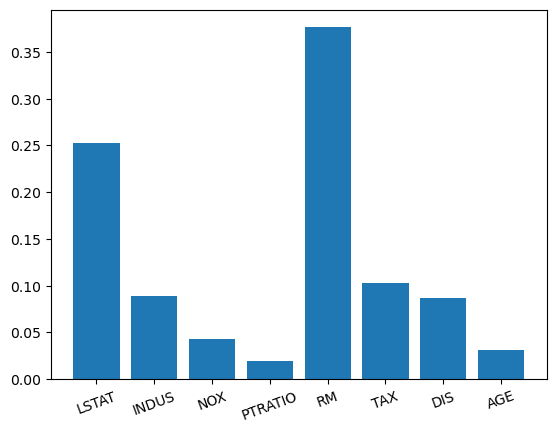

In [9]:
import active_subspaces.utils.misc as misc
import active_subspaces as ac
import time
"""
Compute the gradient matrix
"""
sample_data = np.loadtxt('sample_data_independent.csv', delimiter=',')
start = time.time()
df = ac.gradients.finite_difference_gradients(sample_data, svr_rbf.predict, h=10e-6)
"""
compute DerSHAP
"""
norm_shap = DerSHAP(df)
print("DerSHAP time is: " , time.time()-start)

#Component labels
in_labels =['LSTAT', 'INDUS', 'NOX', 'PTRATIO', 'RM', 'TAX', 'DIS', 'AGE']
plt.xticks([0, 1, 2,3,4,5,6,7], in_labels,rotation=20)
plt.bar(in_labels, norm_shap)
plt.savefig("boston_SVR_independent.pdf")
print(np.round(norm_shap,3))

# GBR Model

DerSHAP time is:  5.2529778480529785
[0.149 0.012 0.102 0.226 0.5   0.01  0.001 0.   ]


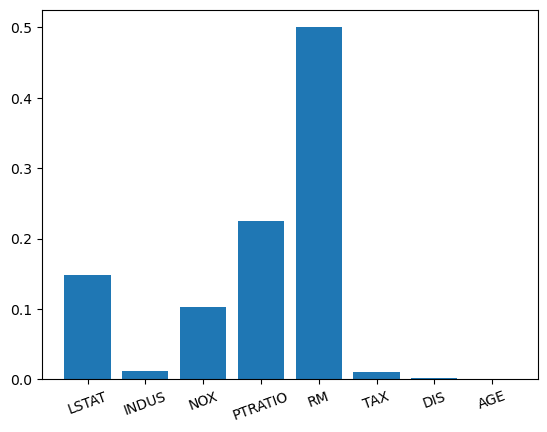

In [10]:
# For the GBR Model
sample_data = np.loadtxt('sample_data_independent.csv', delimiter=',')
start = time.time()
df = ac.gradients.finite_difference_gradients(sample_data, gbr.predict, h=10-6)
"""
compute DerSHAP
"""
norm_shap = DerSHAP(df)
print("DerSHAP time is: " , time.time()-start)
#Component labels
in_labels =['LSTAT', 'INDUS', 'NOX', 'PTRATIO', 'RM', 'TAX', 'DIS', 'AGE']
plt.xticks([0, 1, 2,3,4,5,6,7], in_labels,rotation=20)
plt.bar(in_labels, norm_shap)
plt.savefig("boston_GBR_independent.pdf")
print(np.round(norm_shap,3))

# KernelSHAP - SVR Model

  0%|          | 0/10000 [00:00<?, ?it/s]

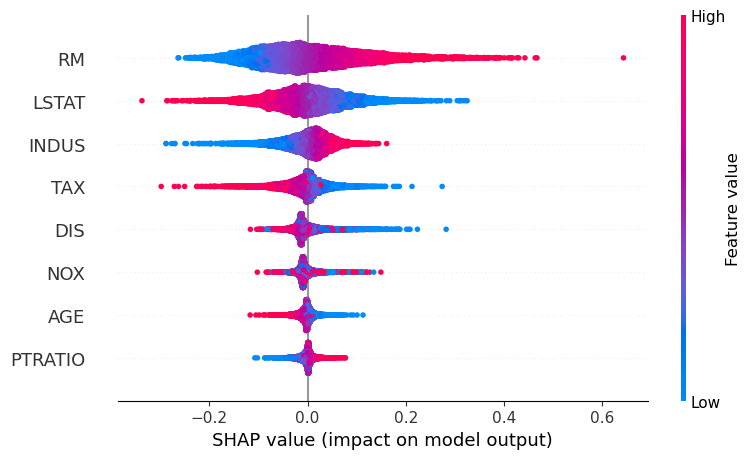

1953.0735762119293


In [11]:
"""
Independent case, sample 50 data
"""
import shap, time
sample_data = np.loadtxt('sample_data_independent.csv', delimiter=',')
start = time.time()
explainer = shap.KernelExplainer(model = svr_rbf.predict,data = shap.sample(x_scaled,50))
shap_values = explainer.shap_values(sample_data)
shap.summary_plot(shap_values, sample_data, feature_names = ['LSTAT', 'INDUS', 'NOX', 'PTRATIO', 'RM', 'TAX', 'DIS', 'AGE'])
print(time.time()-start)

# KernelSHAP - GBR Model

  0%|          | 0/10000 [00:00<?, ?it/s]

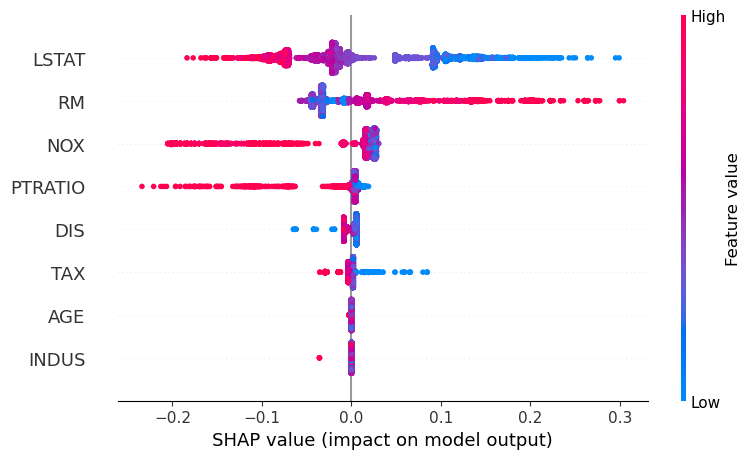

393.35164499282837


In [12]:
"""
Independent case, sample 50 data
"""
import shap, time
sample_data = np.loadtxt('sample_data_independent.csv', delimiter=',')
start = time.time()
explainer = shap.KernelExplainer(model = gbr.predict, data = shap.sample(x_scaled,50))
shap_values = explainer.shap_values(sample_data)
shap.summary_plot(shap_values, sample_data, feature_names = ['LSTAT', 'INDUS', 'NOX', 'PTRATIO', 'RM', 'TAX', 'DIS', 'AGE'])
print(time.time()-start)

# Sample Random Variables - dependent 
###  Then, we assume that the inputs are dependent and follows the normal distribution

In [13]:
"""
Get the Covariance matrix
"""
df1 = x
new_data=pd.concat([df1['LSTAT'], df1['INDUS'], df1['NOX'],df1['PTRATIO'], df1['RM'], 
     df1['TAX'], df1['DIS'], df1['AGE']], axis=1)
new_data.cov()

,LSTAT,INDUS,NOX,PTRATIO,RM,TAX,DIS,AGE
LSTAT,0.020870,0.017265,0.015804,0.007636,-0.011253,0.017727,-0.012055,0.017290
INDUS,0.017265,0.032774,0.024346,0.010294,-0.009582,0.027857,-0.019537,0.020953
NOX,0.015804,0.024346,0.029406,0.004906,-0.007018,0.024913,-0.020680,0.023755
PTRATIO,0.007636,0.010294,0.004906,0.022243,-0.005422,0.013315,-0.004944,0.006552
RM,-0.011253,-0.009582,-0.007018,-0.005422,0.015662,-0.007728,0.004771,-0.006083
TAX,0.017727,0.027857,0.024913,0.013315,-0.007728,0.046285,-0.017398,0.019157
DIS,-0.012055,-0.019537,-0.020680,-0.004944,0.004771,-0.017398,0.021354,-0.020472
AGE,0.017290,0.020953,0.023755,0.006552,-0.006083,0.019157,-0.020472,0.035007


In [14]:
"""
Sample the dependent inputs using the known mu and covariance
"""
M = 10000
d = 8
cov_mat=[[0.020870,0.017265,0.015804,0.007636,-0.011253,0.017727,-0.012055,0.017290],
        [0.017265,0.032774,0.024346,0.010294,-0.009582,0.027857,-0.019537,0.020953],
        [0.015804,0.024346,0.029406,0.004906,-0.007018,0.024913,-0.020680,0.023755],
        [0.007636,0.010294,0.004906,0.022243,-0.005422,0.013315,-0.004944,0.006552],
        [-0.011253,-0.009582,-0.007018,-0.005422,0.015662,-0.007728,0.004771,-0.006083],
        [0.017727,0.027857,0.024913,0.013315,-0.007728,0.046285,-0.017398,0.019157],
        [-0.012055,-0.019537,-0.020680,-0.004944,0.004771,-0.017398,0.021354,-0.020472],
        [0.017290,0.020953,0.023755,0.006552,-0.006083,0.019157,-0.020472,0.035007]]
mu = [df1['LSTAT'].mean(), df1['INDUS'].mean(), df1['NOX'].mean(),df1['PTRATIO'].mean(), df1['RM'].mean(), 
     df1['TAX'].mean(), df1['DIS'].mean(), df1['AGE'].mean()]
xx = np.random.default_rng().multivariate_normal(mu, cov_mat, size=M)
x_scaled = min_max_scaler.fit_transform(xx)
np.savetxt('sample_data_dependent.csv', x_scaled, delimiter=',')
x_scaled

array([[0.42550146, 0.29085287, 0.38546601, ..., 0.42508527, 0.53776807,
        0.58127555],
       [0.49206646, 0.43566866, 0.45670314, ..., 0.47190488, 0.42704631,
        0.40772328],
       [0.30771804, 0.39857554, 0.36942168, ..., 0.30686781, 0.52857989,
        0.4341574 ],
       ...,
       [0.48120037, 0.57066945, 0.49755943, ..., 0.69465701, 0.31168654,
        0.54603496],
       [0.40989952, 0.38542417, 0.36085003, ..., 0.46044039, 0.61356764,
        0.33564611],
       [0.40612647, 0.34108287, 0.40405031, ..., 0.32783004, 0.62627688,
        0.41250008]])

DerSHAP time is:  3.953126907348633
[0.211 0.054 0.028 0.005 0.467 0.137 0.069 0.029]


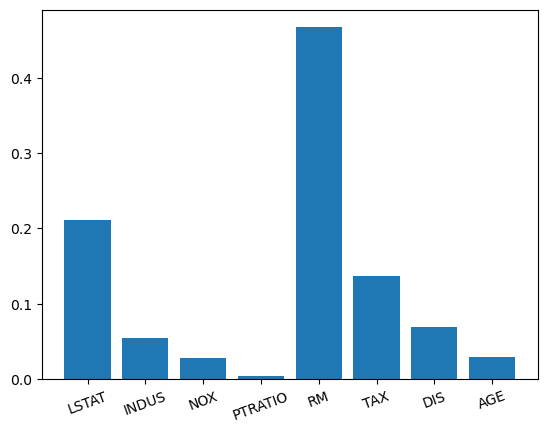

In [15]:
"""
Compute the gradient matrix
"""
sample_data = np.loadtxt('sample_data_dependent.csv', delimiter=',')
start = time.time()
df = ac.gradients.finite_difference_gradients(sample_data, svr_rbf.predict, h=10e-6)
"""
compute DerSHAP
"""
norm_shap = DerSHAP(df)
print("DerSHAP time is: " , time.time()-start)

#Component labels
in_labels =['LSTAT', 'INDUS', 'NOX', 'PTRATIO', 'RM', 'TAX', 'DIS', 'AGE']
plt.xticks([0, 1, 2,3,4,5,6,7], in_labels,rotation=20)
plt.bar(in_labels, norm_shap)
plt.savefig("boston_SVR_dependent.pdf")
print(np.round(norm_shap,3))

DerSHAP time is:  5.160682916641235
[0.225 0.012 0.104 0.285 0.363 0.009 0.001 0.   ]


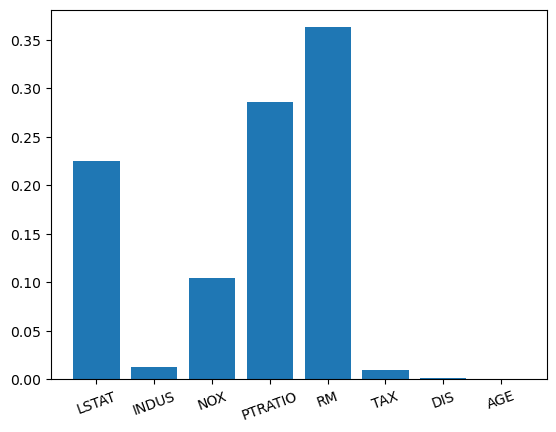

In [16]:
# For the GBR Model
sample_data = np.loadtxt('sample_data_dependent.csv', delimiter=',')
start = time.time()
df = ac.gradients.finite_difference_gradients(sample_data, gbr.predict, h=10-6)
"""
compute DerSHAP
"""
norm_shap = DerSHAP(df)
print("DerSHAP time is: " , time.time()-start)
#Component labels
in_labels =['LSTAT', 'INDUS', 'NOX', 'PTRATIO', 'RM', 'TAX', 'DIS', 'AGE']
plt.xticks([0, 1, 2,3,4,5,6,7], in_labels,rotation=20)
plt.bar(in_labels, norm_shap)
plt.savefig("boston_GBR_dependent.pdf")
print(np.round(norm_shap,3))